<a href="https://colab.research.google.com/github/linconsarker/machine-learning/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [14]:
# Load Titanic dataset
df = sns.load_dataset("titanic")

# Show first rows
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
# Select features
df = df[['survived','pclass','sex','age','fare','alone']]

# Handle missing values
df = df.dropna()

# Encode categorical variable "sex"
df['sex'] = df['sex'].map({'male':0, 'female':1})

# Features and target
X = df.drop("survived", axis=1)
y = df["survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Predictions
y_pred = tree_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7132867132867133

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.77        87
           1       0.64      0.62      0.63        56

    accuracy                           0.71       143
   macro avg       0.70      0.70      0.70       143
weighted avg       0.71      0.71      0.71       143



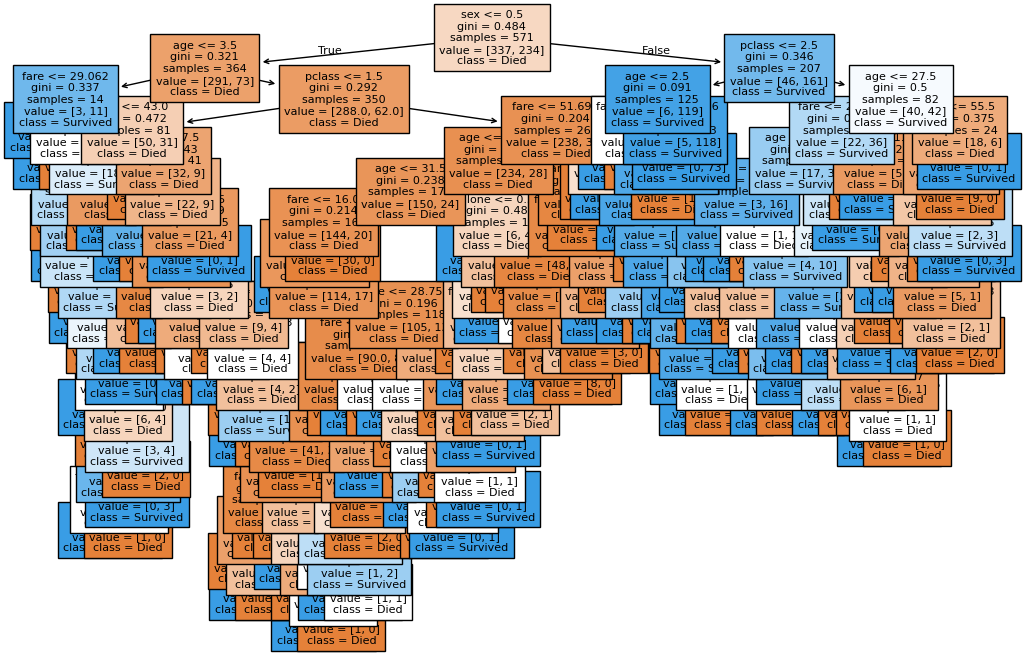

In [17]:
plt.figure(figsize=(12,8))
plot_tree(tree_clf, feature_names=X.columns, class_names=["Died","Survived"], filled=True, fontsize=8)
plt.show()


In [18]:
shallow_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
shallow_tree.fit(X_train, y_train)
print("Shallow Tree Accuracy:", accuracy_score(y_test, shallow_tree.predict(X_test)))


Shallow Tree Accuracy: 0.7412587412587412


In [19]:
tree_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
tree_entropy.fit(X_train, y_train)
print("Entropy Tree Accuracy:", accuracy_score(y_test, tree_entropy.predict(X_test)))


Entropy Tree Accuracy: 0.6993006993006993


In [20]:
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": tree_clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importances)

  Feature  Importance
1     sex    0.325030
2     age    0.284734
3    fare    0.252394
0  pclass    0.133899
4   alone    0.003943


In [21]:
pruned_tree = DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=10, random_state=42)
pruned_tree.fit(X_train, y_train)
print("Pruned Tree Accuracy:", accuracy_score(y_test, pruned_tree.predict(X_test)))


Pruned Tree Accuracy: 0.7692307692307693
